In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data_dir = '/kaggle/input/5-flower-types-classification-dataset/flower_images/'
img_height = 128
img_width = 128
batch_size = 32

In [3]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='training',
    seed=42,
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 4999 files belonging to 5 classes.
Using 4000 files for training.


In [4]:
val_dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='validation',
    seed=42,
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 4999 files belonging to 5 classes.
Using 999 files for validation.


In [5]:
class_names = train_dataset.class_names
class_names

['Lilly', 'Lotus', 'Orchid', 'Sunflower', 'Tulip']

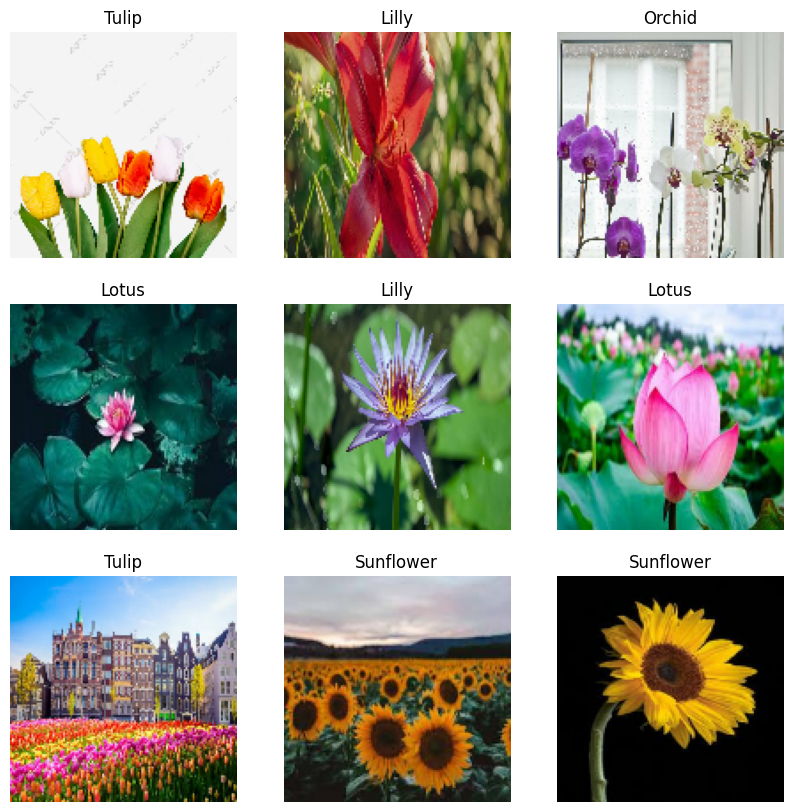

In [6]:
plt.figure(figsize=(10,10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [7]:
for image_batch, labels_batch in train_dataset:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 128, 128, 3)
(32,)


In [8]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.cache().prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.cache().prefetch(buffer_size=AUTOTUNE) 

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5)
  ])
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
history = model.fit(train_dataset,validation_data=val_dataset,epochs=10)

Epoch 1/10
125/125 [==============================] - 28s 148ms/step - loss: 1.2291 - accuracy: 0.5008 - val_loss: 1.1347 - val_accuracy: 0.5155
Epoch 2/10
125/125 [==============================] - 2s 13ms/step - loss: 0.9879 - accuracy: 0.6118 - val_loss: 0.9561 - val_accuracy: 0.6406
Epoch 3/10
125/125 [==============================] - 2s 13ms/step - loss: 0.8232 - accuracy: 0.6808 - val_loss: 0.8612 - val_accuracy: 0.6807
Epoch 4/10
125/125 [==============================] - 2s 13ms/step - loss: 0.6478 - accuracy: 0.7580 - val_loss: 0.7707 - val_accuracy: 0.7007
Epoch 5/10
125/125 [==============================] - 2s 13ms/step - loss: 0.4750 - accuracy: 0.8282 - val_loss: 0.6951 - val_accuracy: 0.7467
Epoch 6/10
125/125 [==============================] - 2s 13ms/step - loss: 0.3834 - accuracy: 0.8640 - val_loss: 0.6379 - val_accuracy: 0.7858
Epoch 7/10
125/125 [==============================] - 2s 13ms/step - loss: 0.2734 - accuracy: 0.9085 - val_loss: 0.8952 - val_accuracy: 0.73

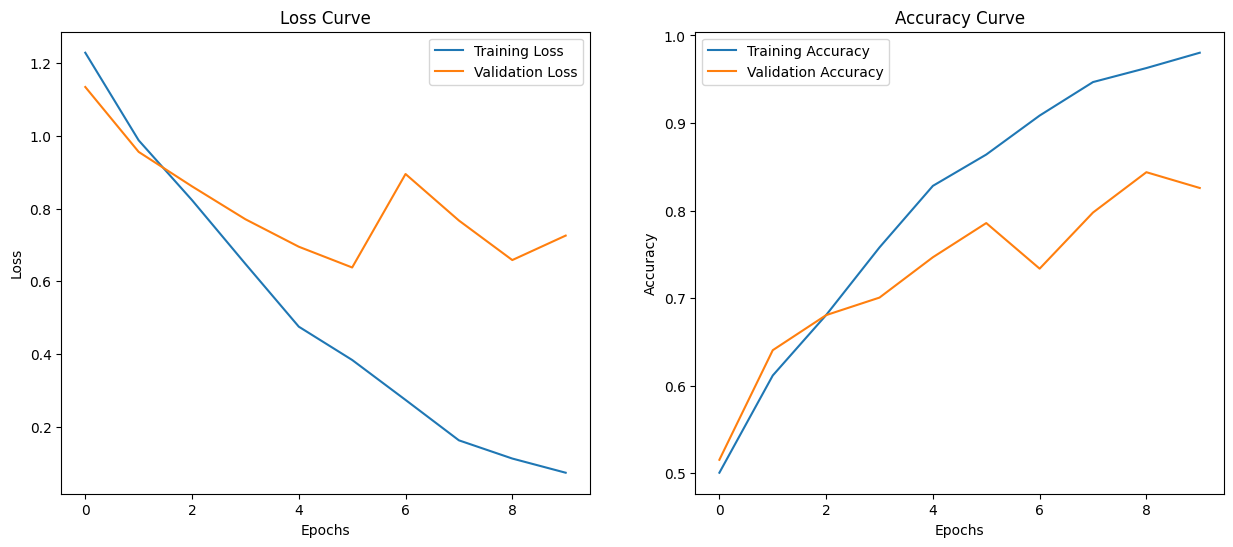

In [10]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()